In [1]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from src.bandit.algorithms.standard import EpsilonGreedy
from src.bandit.arms.bernoulli import BernoulliArm
from src.bandit.simulation.monte_carlo import test_algorithm

In [22]:
reward_values = [0.6, 0.7, 0.8, 0.9, 1.0] # reward from each arm
means = [                                 
    [0.020, 0.018, 0.015, 0.012, 0.010], # probability of conversion for lower engaging users across each corresponding discount
    [0.032, 0.030, 0.030, 0.025, 0.020]  # probability of conversion for higher engaging users across each corresponding discount
]
n_arms = len(reward_values)


In [25]:
test_results = pd.DataFrame(columns=["group","sim_num","time","chosen_arm","reward","cumulative_reward"])

for k in range(2):
    if k == 0:
        cohort = "low engagement"
    elif k == 1:
        cohort = "high engagement"
    arms = [BernoulliArm(i) for i in means[k]]
    algo = EpsilonGreedy(0.2,[],[])
    algo.initialize(n_arms)
    
    results = test_algorithm(
        algo=algo, 
        arms=arms, 
        reward_values=reward_values,
        n_iter=100, 
        horizon=10000
    )

    

    data = {
        "group": cohort,
        "sim_num": results[0],
        "time": results[1],
        "chosen_arm": results[2],
        "reward": results[3],
        "cumulative_reward": results[4]
    }

    result = pd.DataFrame(data = data)

    test_results = pd.concat([test_results, result])

<AxesSubplot: xlabel='time', ylabel='reward'>

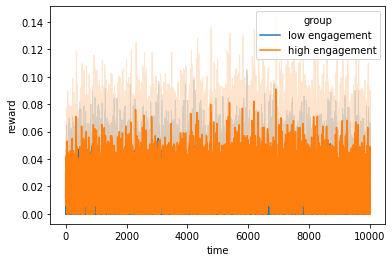

In [26]:
sns.lineplot(
    x=test_results["time"],
    y=test_results["reward"],
    hue=test_results["group"]
)

In [203]:
burn_in_period = 200
test_results.query(f"epsilon==0.2 & time>{burn_in_period}")
sns.histplot(
    data=np.log1p(test_results.query(f"epsilon==0.2 & time>{burn_in_period}")),
    x="reward",
    hue="chosen_arm",
    stat="probability",
    common_norm="false",
    common_bins="false"
)

In [174]:
test_results.query("epsilon==0.2 & time==200").groupby("chosen_arm").mean("reward")

,epsilon,reward,cumulative_reward
chosen_arm,,,
0,0.2,0.029727,37749.068817
1,0.2,0.014493,38588.053442
2,0.2,0.010650,38826.863685
3,0.2,0.015625,36864.065341
4,0.2,0.001905,37956.306667


In [171]:
test_results.query("epsilon==0.4 & time==200")

,epsilon,sim_num,time,chosen_arm,reward,cumulative_reward
199,0.4,1,200,2,0.0,4.0
499,0.4,2,200,3,0.0,8.0
799,0.4,3,200,0,0.0,17.0
1099,0.4,4,200,0,0.0,22.0
1399,0.4,5,200,0,0.0,34.0
...,...,...,...,...,...,...
2998699,0.4,9996,200,1,0.0,65774.0
2998999,0.4,9997,200,4,0.0,65777.0
2999299,0.4,9998,200,2,0.0,65781.0
2999599,0.4,9999,200,0,0.0,65786.0


In [160]:
sns.lineplot(
    data=test_results, 
    x="time", 
    y="reward",
    hue="epsilon")

,epsilon,sim_num,time,chosen_arm,reward,cumulative_reward
0,0.1,1,1,0,0.0,0.0
1,0.1,1,2,0,0.0,0.0
2,0.1,1,3,0,0.0,0.0
3,0.1,1,4,0,0.0,0.0
4,0.1,1,5,0,0.0,0.0
